In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [323]:
df0 = pd.read_csv('weatherHistory.csv')

In [324]:
# Selecting columns of use

df = df0[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)']]

In [325]:
df.head()

,Temperature (C),Humidity,Wind Speed (km/h)
0,9.472222,0.89,14.1197
1,9.355556,0.86,14.2646
2,9.377778,0.89,3.9284
3,8.288889,0.83,14.1036
4,8.755556,0.83,11.0446


In [326]:
df.set_index('Temperature (C)')

,Humidity,Wind Speed (km/h)
Temperature (C),,
9.472222,0.89,14.1197
9.355556,0.86,14.2646
9.377778,0.89,3.9284
8.288889,0.83,14.1036
8.755556,0.83,11.0446
...,...,...
26.016667,0.43,10.9963
24.583333,0.48,10.0947
22.038889,0.56,8.9838


In [327]:
df.isna().sum()

Temperature (C)      0
Humidity             0
Wind Speed (km/h)    0
dtype: int64

No Null Values Found!!!

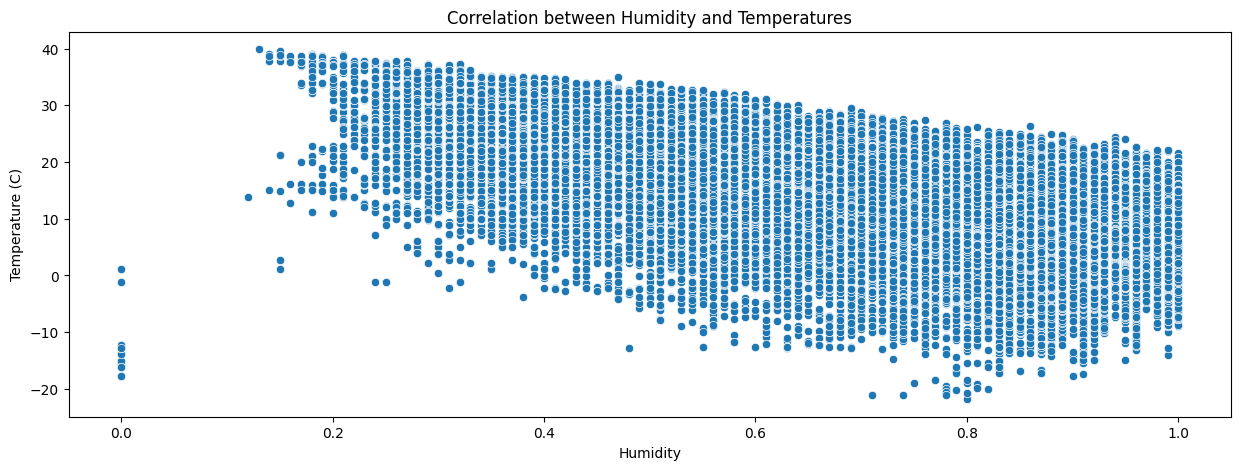

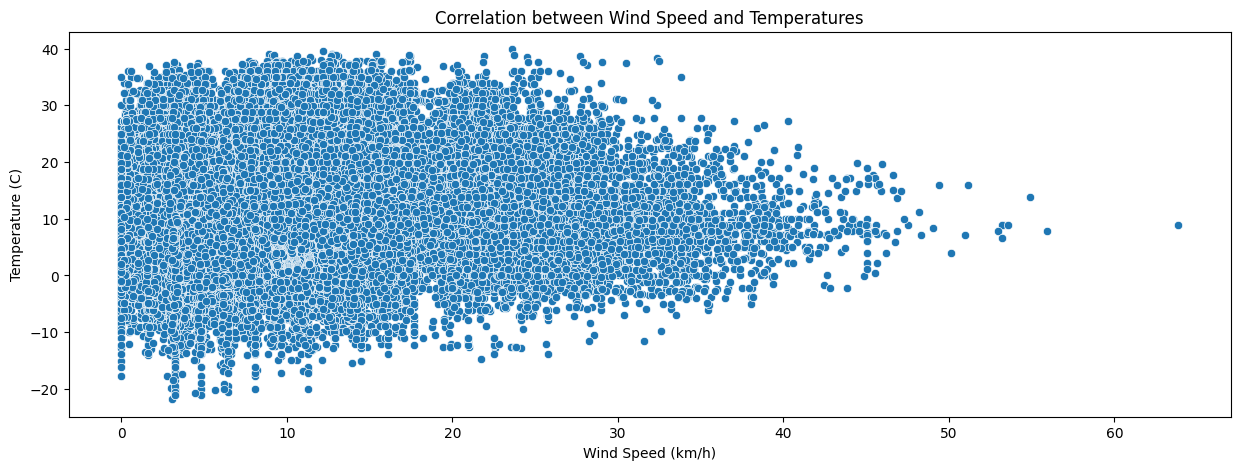

In [328]:
# Relationship between variables

f, ax = plt.subplots(1, 1, figsize = (15, 5))
ax = sns.scatterplot(data = df, x = 'Humidity', y = 'Temperature (C)')
ax.set_title('Correlation between Humidity and Temperatures')

f, ax = plt.subplots(1, 1, figsize = (15, 5))
ax = sns.scatterplot(data = df, x = 'Wind Speed (km/h)', y = 'Temperature (C)')
ax.set_title('Correlation between Wind Speed and Temperatures')
plt.show()

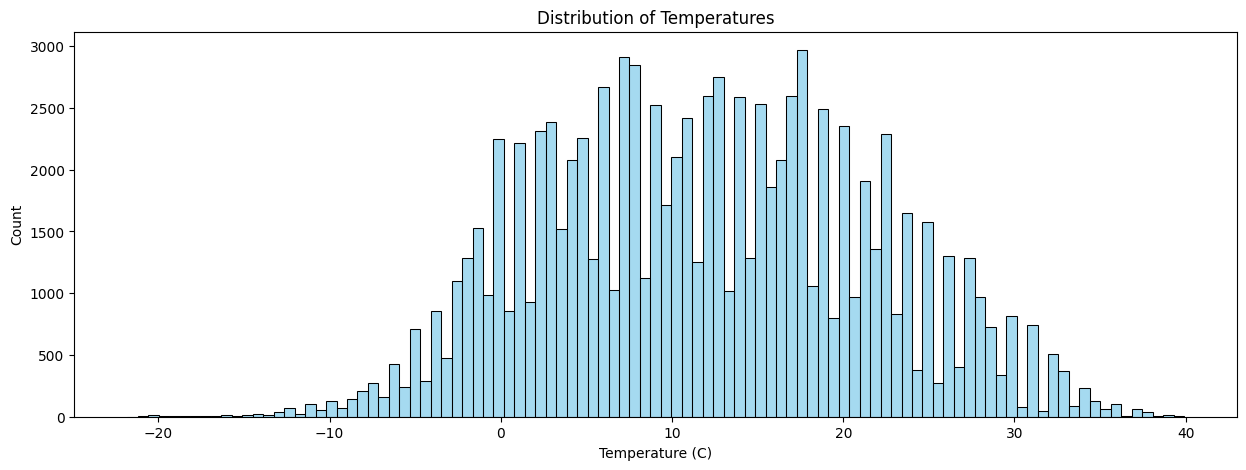

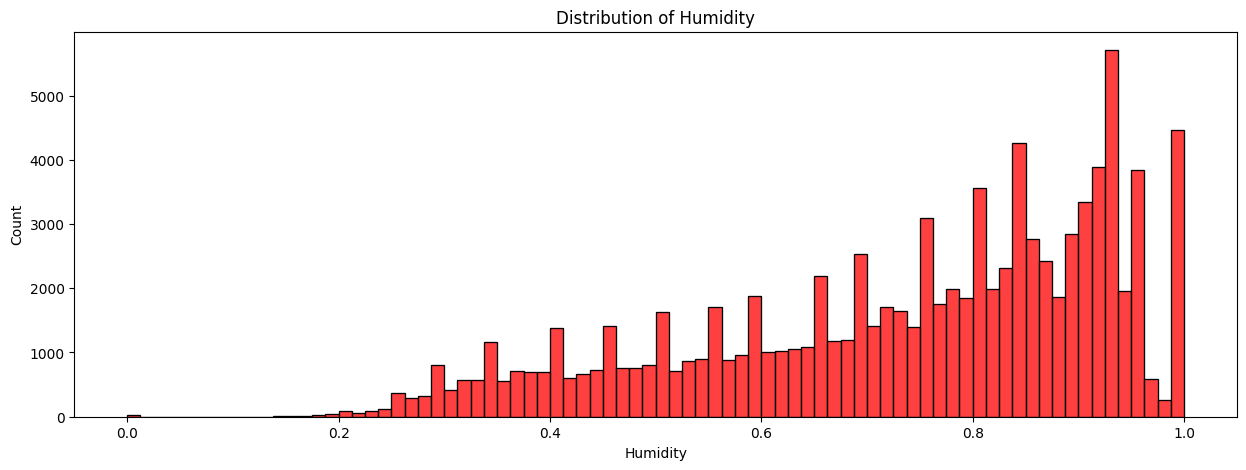

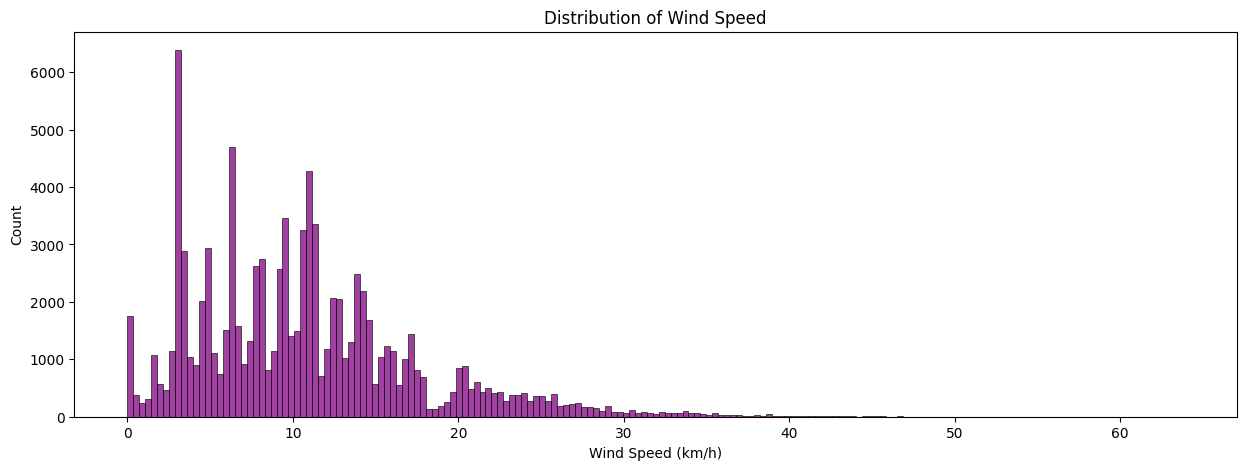

In [329]:
# Distributions of variables

f, ax = plt.subplots(1, 1, figsize = (15, 5))
ax = sns.histplot(data = df, x = 'Temperature (C)', color = 'skyblue')
ax.set_title('Distribution of Temperatures')
f, ax = plt.subplots(1, 1, figsize = (15, 5))
ax = sns.histplot(data = df, x = 'Humidity', color = 'red')
ax.set_title('Distribution of Humidity')
f, ax = plt.subplots(1, 1, figsize = (15, 5))
ax = sns.histplot(data = df, x = 'Wind Speed (km/h)', color = 'purple')
ax.set_title('Distribution of Wind Speed')
plt.show()


In [330]:
# Selecting Dependent and Independent varaibles

Dependent_variable = df['Temperature (C)']
Independent_factors = df.drop('Temperature (C)', axis = 1)

In [331]:
# Splitting data into Training and Testing sets

X_train, X_test, Y_train, Y_test = train_test_split(Independent_factors, Dependent_variable, test_size = 0.2, random_state = 42)

In [332]:
model_1 = LinearRegression()

In [333]:
model_1.fit(X_train, Y_train)

LinearRegression()

In [334]:
pred = model_1.predict(X_test)

In [335]:
rmse = np.sqrt(mean_squared_error(Y_test, pred))

In [346]:
print(f'Root Mean Squarred Error of Model_1: {rmse}')

Root Mean Squarred Error of Model_1: 7.934713859822224


In [347]:
r2 = r2_score(Y_test, pred)
print(f'R2 Score of Model_1: {r2}')

R2 Score of Model_1: 0.41482117662361717


In [338]:
model_2 = RandomForestRegressor()

In [339]:
model_2.fit(X_train, Y_train)

RandomForestRegressor()

In [340]:
pred_2 = model_2.predict(X_test)

In [342]:
rmse = np.sqrt(mean_squared_error(Y_test, pred_2))

In [348]:
print(f'Root Mean Squarred Error of Model_2: {rmse}')

Root Mean Squarred Error of Model_2: 7.934713859822224


In [349]:
r2 = r2_score(Y_test, pred_2)
print(f'R2 Score of Model_1: {r2}')

R2 Score of Model_1: 0.31683833321531285


By looking at the metrics of both the models, it is clear that model_1 works better!!!